#### import libraries

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

#### Data

In [101]:
data = pd.read_csv("heart_2020_cleaned.csv")

In [102]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Preprocessing

In [103]:
# checking nan values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [105]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### Label Encoding

In [106]:
data["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [107]:
data["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [108]:
data["AlcoholDrinking"].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
data["Stroke"].unique()

array(['No', 'Yes'], dtype=object)

In [110]:
data["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [111]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [112]:
data["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [113]:
data["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [114]:
data["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [115]:
data["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

In [116]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# No----> 0 and Yes---> 1
# Female-->0 and Male-->1

# Fit and transform the "Yes" and "No" categorical variable
data["HeartDisease_num"] = encoder.fit_transform(data["HeartDisease"])
data["Smoking_num"] = encoder.fit_transform(data["Smoking"])
data["AlcoholDrinking_num"] = encoder.fit_transform(data["AlcoholDrinking"])
data["Stroke_num"] = encoder.fit_transform(data["Stroke"])
data["DiffWalking_num"] = encoder.fit_transform(data["DiffWalking"])
data["Sex_num"] = encoder.fit_transform(data["Sex"])
#data["Diabetic_num"] = encoder.fit_transform(data["Diabetic"])
data["PhysicalActivity_num"] = encoder.fit_transform(data["PhysicalActivity"])
data["Asthma_num"] = encoder.fit_transform(data["Asthma"])
data["KidneyDisease_num"] = encoder.fit_transform(data["KidneyDisease"])
data["SkinCancer_num"] = encoder.fit_transform(data["SkinCancer"])

In [117]:
data["AgeCategory"].nunique()

13

In [118]:
sorted(data["AgeCategory"].unique())

['18-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80 or older']

In [119]:
# labeling by age group
data["AgeCategory_num"] = encoder.fit_transform(data["AgeCategory"])

In [120]:
#checking Age Labeling
data[["AgeCategory", "AgeCategory_num"]].drop_duplicates().sort_values("AgeCategory_num").reset_index(drop=True)

,AgeCategory,AgeCategory_num
0,18-24,0
1,25-29,1
2,30-34,2
3,35-39,3
4,40-44,4
5,45-49,5
6,50-54,6
7,55-59,7
8,60-64,8
9,65-69,9


#### mapping method for cat to num

In [121]:
sorted(data["GenHealth"].unique())

['Excellent', 'Fair', 'Good', 'Poor', 'Very good']

In [122]:
mapping_genhealth = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good' : 3, 'Excellent' : 4}

# Use the map() function to apply the mapping to the categorical variable
data["GenHealth_num"] = data["GenHealth"].map(mapping_genhealth)

In [123]:
sorted(data["Diabetic"].unique())

['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']

In [124]:
mapping_diabetic = {'No': 0, 'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2, 'Yes' : 3}

# Use the map() function to apply the mapping to the categorical variable
data["Diabetic_num"] = data["Diabetic"].map(mapping_diabetic)

#### get_dummies

In [125]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [126]:
pd.get_dummies(data["Race"]).drop(columns="Other")

,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
319790,0,0,0,1,0
319791,0,0,0,1,0
319792,0,0,0,1,0
319793,0,0,0,1,0


In [127]:
data=pd.concat([data, pd.get_dummies(data["Race"]).drop(columns="Other")], axis=1)

In [128]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,KidneyDisease_num,SkinCancer_num,AgeCategory_num,GenHealth_num,Diabetic_num,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,1,7,3,3,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,12,3,0,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,0,9,1,3,0,0,0,0,1
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,1,11,2,0,0,0,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,0,0,4,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,0,0,8,1,3,0,0,0,1,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,0,0,3,3,0,0,0,0,1,0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,0,0,5,2,0,0,0,0,1,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,0,0,1,2,0,0,0,0,1,0


In [129]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_num',
       'Smoking_num', 'AlcoholDrinking_num', 'Stroke_num', 'DiffWalking_num',
       'Sex_num', 'PhysicalActivity_num', 'Asthma_num', 'KidneyDisease_num',
       'SkinCancer_num', 'AgeCategory_num', 'GenHealth_num', 'Diabetic_num',
       'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
       'White'],
      dtype='object')

In [130]:
data=data.drop(columns=["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex", "AgeCategory","Race",
                        "Diabetic","PhysicalActivity","GenHealth", "Asthma","KidneyDisease", "SkinCancer"])

In [131]:
data

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_num,Smoking_num,AlcoholDrinking_num,Stroke_num,DiffWalking_num,Sex_num,...,KidneyDisease_num,SkinCancer_num,AgeCategory_num,GenHealth_num,Diabetic_num,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,0,1,7,3,3,0,0,0,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,12,3,0,0,0,0,0,1
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,0,0,9,1,3,0,0,0,0,1
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,1,11,2,0,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,4,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,0,0,8,1,3,0,0,0,1,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,3,3,0,0,0,0,1,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,5,2,0,0,0,0,1,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,1,0


In [134]:
data = data[['HeartDisease_num'] + [col for col in data.columns if col != 'HeartDisease_num']]

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease_num                319795 non-null  int32  
 1   BMI                             319795 non-null  float64
 2   PhysicalHealth                  319795 non-null  float64
 3   MentalHealth                    319795 non-null  float64
 4   SleepTime                       319795 non-null  float64
 5   Smoking_num                     319795 non-null  int32  
 6   AlcoholDrinking_num             319795 non-null  int32  
 7   Stroke_num                      319795 non-null  int32  
 8   DiffWalking_num                 319795 non-null  int32  
 9   Sex_num                         319795 non-null  int32  
 10  PhysicalActivity_num            319795 non-null  int32  
 11  Asthma_num                      319795 non-null  int32  
 12  KidneyDisease_nu

import seaborn as sns

sns.heatmap(data.corr())

sns.pairplot(data.sample(n=20000, random_state=22), hue="HeartDisease_num")

import matplotlib.pyplot as plt
#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10))
#sns.set(font_scale=1.5)

sns.heatmap(data.corr(),
            cmap='coolwarm')

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

# Data is ready to run

# 1. Aşama

In [164]:
# 4'er adet True ve False örneklerin alınması
true_samples = data[data['HeartDisease_num'] == 1].sample(n=4, random_state=22)
false_samples = data[data['HeartDisease_num'] == 0].sample(n=4, random_state=22)
selected_samples = pd.concat([true_samples, false_samples], axis=0).reset_index(drop=True)

In [172]:
selected_samples

,HeartDisease_num,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_num,AlcoholDrinking_num,Stroke_num,DiffWalking_num,Sex_num,...,KidneyDisease_num,SkinCancer_num,AgeCategory_num,GenHealth_num,Diabetic_num,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,1,33.20,30.0,0.0,5.0,0,0,0,0,1,...,0,0,8,1,0,0,0,0,0,1
1,1,29.84,0.0,30.0,8.0,1,0,0,1,1,...,1,0,10,1,3,0,0,0,0,1
2,1,24.80,0.0,0.0,8.0,1,0,0,0,1,...,0,0,9,2,0,0,0,0,0,1
3,1,32.28,0.0,0.0,8.0,1,0,0,1,0,...,0,0,11,2,0,1,0,0,0,0
4,0,30.67,0.0,10.0,7.0,0,0,0,0,0,...,0,0,7,2,0,0,0,0,0,1
5,0,24.43,0.0,5.0,8.0,1,0,0,0,1,...,0,0,2,3,0,0,0,0,0,1
6,0,25.06,0.0,0.0,8.0,0,0,0,0,0,...,0,0,5,3,0,0,0,0,0,1
7,0,28.45,7.0,30.0,8.0,1,0,0,0,1,...,0,0,2,3,0,1,0,0,0,0


In [212]:
X = selected_samples.iloc[:,1:17].sample(n=5, axis=1, random_state=36)
y = selected_samples['HeartDisease_num']

In [213]:
X

,SkinCancer_num,AgeCategory_num,GenHealth_num,SleepTime,BMI
0,0,8,1,5.0,33.20
1,0,10,1,8.0,29.84
2,0,9,2,8.0,24.80
3,0,11,2,8.0,32.28
4,0,7,2,7.0,30.67
5,0,2,3,8.0,24.43
6,0,5,3,8.0,25.06
7,0,2,3,8.0,28.45


In [214]:
y

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: HeartDisease_num, dtype: int32

In [217]:
# Gini Index ile Karar Ağacı oluştur
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini.fit(X, y)

DecisionTreeClassifier(random_state=1)

1. AŞAMA 8 örnekli Gini İndeks kullanılarak karar ağacı oluşturulması


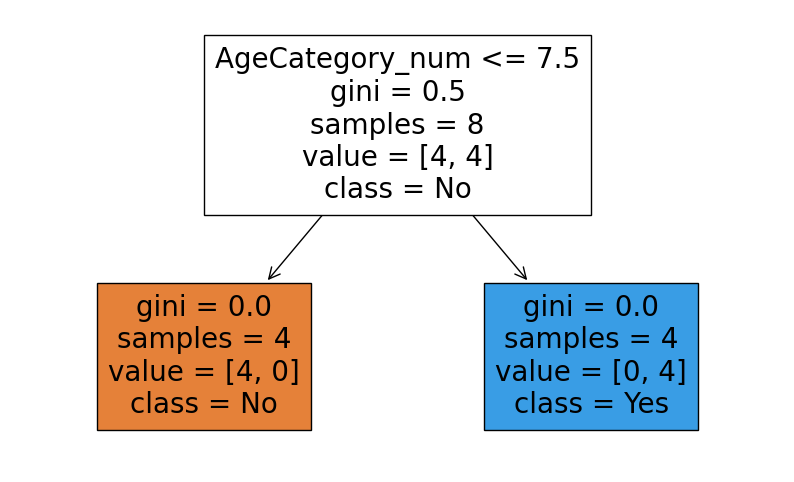

In [219]:
print("1. AŞAMA 8 örnekli Gini İndeks kullanılarak karar ağacı oluşturulması")
fig = plt.figure(figsize=(10,6))
_ = tree.plot_tree(clf_gini,
                   feature_names=X.columns,
                   class_names=["No", "Yes"],
                   filled=True)
plt.show()

In [220]:
# Entropy ile Karar Ağacı oluştur
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

1. AŞAMA 8 örnekli Entropy kullanılarak karar ağacı oluşturulması


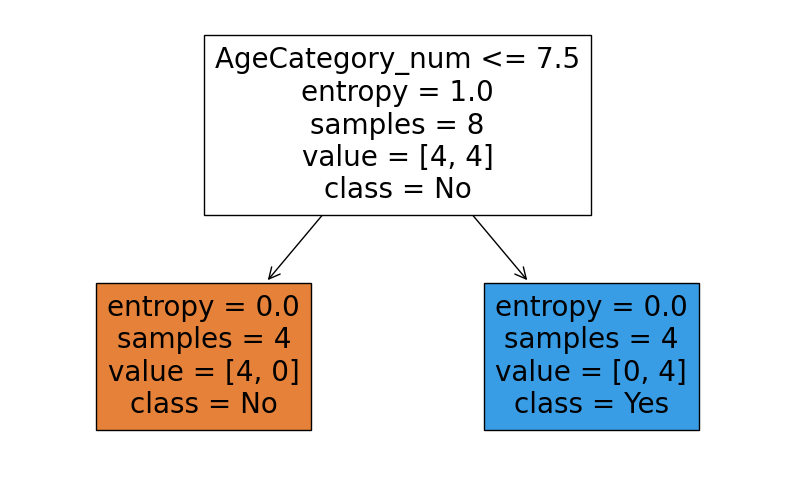

In [222]:
print("1. AŞAMA 8 örnekli Entropy kullanılarak karar ağacı oluşturulması")
fig = plt.figure(figsize=(10,6))
_ = tree.plot_tree(clf_entropy,
                   feature_names=X.columns,
                   class_names=["No", "Yes"],
                   filled=True)
plt.show()

## 2. Aşama

In [258]:
df2=data.copy()
df2.head()

,HeartDisease_num,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_num,AlcoholDrinking_num,Stroke_num,DiffWalking_num,Sex_num,...,KidneyDisease_num,SkinCancer_num,AgeCategory_num,GenHealth_num,Diabetic_num,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,0,16.60,3.0,30.0,5.0,1,0,0,0,0,...,0,1,7,3,3,0,0,0,0,1
1,0,20.34,0.0,0.0,7.0,0,0,1,0,0,...,0,0,12,3,0,0,0,0,0,1
2,0,26.58,20.0,30.0,8.0,1,0,0,0,1,...,0,0,9,1,3,0,0,0,0,1
3,0,24.21,0.0,0.0,6.0,0,0,0,0,0,...,0,1,11,2,0,0,0,0,0,1
4,0,23.71,28.0,0.0,8.0,0,0,0,1,0,...,0,0,4,3,0,0,0,0,0,1


In [259]:
df2["HeartDisease_num"].value_counts()

0    292422
1     27373
Name: HeartDisease_num, dtype: int64

In [260]:
df2["HeartDisease_num"].value_counts()/df2["HeartDisease_num"].count()

# this data is imbalanced. it causes biased model.

0    0.914405
1    0.085595
Name: HeartDisease_num, dtype: float64

When dealing with imbalanced datasets where one class is significantly more prevalent than the other, it can pose challenges for machine learning algorithms, as they may be biased towards the majority class and have difficulty accurately predicting the minority class.  we can approach in this way for that kind of situation:

Resampling the dataset: 
1-We can oversample the minority class by creating copies of instances from the minority class to balance the class distribution, or 
2-We can undersample the majority class by randomly removing instances from the majority class. 

In [261]:
df2_No_sampled=df2[df2["HeartDisease_num"]==0].sample(n=27373, random_state=111)
df2_Yes_all=df2[df2["HeartDisease_num"]==1]
df2=pd.concat([df2_No_sampled,df2_Yes_all]).reset_index(drop=True)
df2=df2.sample(frac = 1, random_state=55).reset_index(drop=True) # for shuffling
df2=df2.sample(frac = 1, random_state=65).reset_index(drop=True) # for one more shuffling

In [262]:
df2

,HeartDisease_num,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_num,AlcoholDrinking_num,Stroke_num,DiffWalking_num,Sex_num,...,KidneyDisease_num,SkinCancer_num,AgeCategory_num,GenHealth_num,Diabetic_num,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,1,22.92,0.0,0.0,9.0,1,0,1,1,1,...,0,0,9,1,0,0,0,0,1,0
1,0,32.32,0.0,3.0,6.0,1,0,0,0,1,...,0,0,3,3,0,0,0,0,0,1
2,1,23.05,0.0,0.0,6.0,0,0,0,0,0,...,0,0,12,2,0,0,0,0,0,1
3,0,22.38,0.0,0.0,8.0,0,0,0,0,1,...,0,0,3,4,0,0,0,0,0,1
4,0,25.51,7.0,0.0,9.0,0,0,0,0,0,...,0,0,7,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,1,28.84,4.0,0.0,5.0,0,0,0,0,1,...,0,0,9,1,0,0,0,0,0,1
54742,0,37.11,15.0,0.0,8.0,1,1,0,1,0,...,0,0,6,1,0,0,0,0,1,0
54743,1,28.25,0.0,0.0,6.0,1,0,0,0,1,...,0,0,9,3,0,0,0,0,0,1
54744,1,27.71,0.0,10.0,6.0,1,0,0,0,1,...,0,0,7,2,3,0,0,0,0,1


In [263]:
df2["HeartDisease_num"].value_counts()/df2["HeartDisease_num"].count()

1    0.5
0    0.5
Name: HeartDisease_num, dtype: float64

#### Gini index

In [264]:
# Create your dataset (X: features, y: target labels)
X = df2.drop(columns="HeartDisease_num")
y = df2["HeartDisease_num"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

clf_gini_all = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=42)


In [265]:
# Train the classifier on the training data
clf_gini_all.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [266]:
# Calculate accuracy for Train

accuracy = accuracy_score(y_train, clf_gini_all.predict(X_train))
print(" Train Data Accuracy:", accuracy)

 Train Data Accuracy: 0.7301808384327336


In [267]:
# Make predictions on the testing data
y_pred = clf_gini_all.predict(X_test)

# Calculate accuracy for test
accuracy = accuracy_score(y_test, y_pred)
print(" Test Data Accuracy:", accuracy)

 Test Data Accuracy: 0.7292237442922375


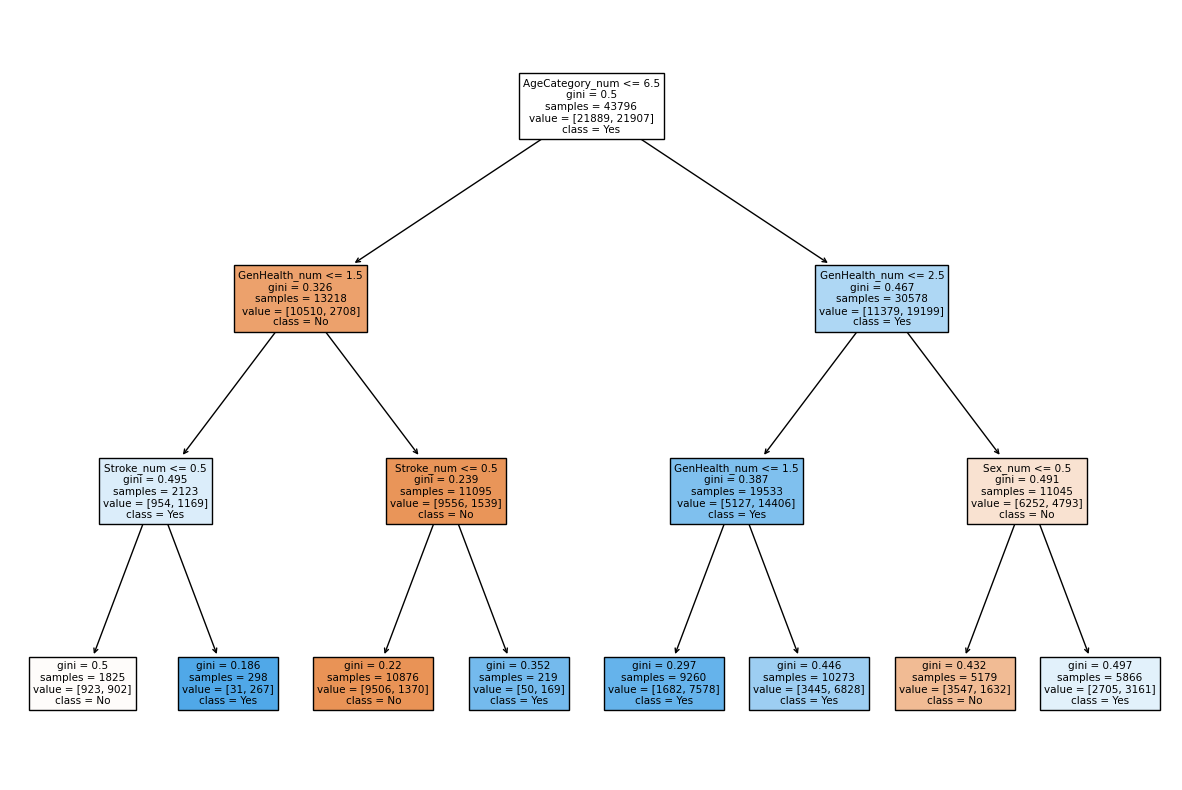

In [268]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_gini_all,
                   feature_names=X.columns,
                   class_names=["No", "Yes"],
                   filled=True)
plt.show()

In [269]:
# gini tuning 

Overfittingin önlenmesi amacıyla cross-validation kullanılarak eğitim yapılmış ve best parametreler bulunmuştur. Eğitim sonrasında eğitim ve test datalarının accuracy değerleri kontrol edilmiş ve birbirine yakın değerlerin olduğu görülmüştür, böylece overfitting olmadığı görülmüştür. Buna ek olarak cross-validation sonrası best parametreler ile oluşturulan modelde test accuracy başarısı arttırılmıştır.

In [271]:
#Parameters
param_grid = {
    'max_depth': [3,5,8,10,14],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [5,7,8,10]
}

In [272]:
# cross validation for finding best parameters
gini_all_tuned = DecisionTreeClassifier(random_state=50)
grid = GridSearchCV(gini_all_tuned, param_grid, n_jobs= -1, cv=10)
grid.fit(X_train, y_train)

print(grid.best_params_) 

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [274]:
gini_all_tuned=DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=2, min_samples_leaf=10, random_state=50)
# Train the classifier on the training data
gini_all_tuned.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gini_all_tuned.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" Test Data Accuracy:", accuracy)

 Test Data Accuracy: 0.7530593607305937


In [275]:
print(" Train Data Accuracy:", accuracy_score(y_train, gini_all_tuned.predict(X_train)))

 Train Data Accuracy: 0.7655036989679422


In [277]:
print("Test Data Classification Results")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Test Data Classification Results
[[3839 1645]
 [1059 4407]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      5484
           1       0.73      0.81      0.77      5466

    accuracy                           0.75     10950
   macro avg       0.76      0.75      0.75     10950
weighted avg       0.76      0.75      0.75     10950



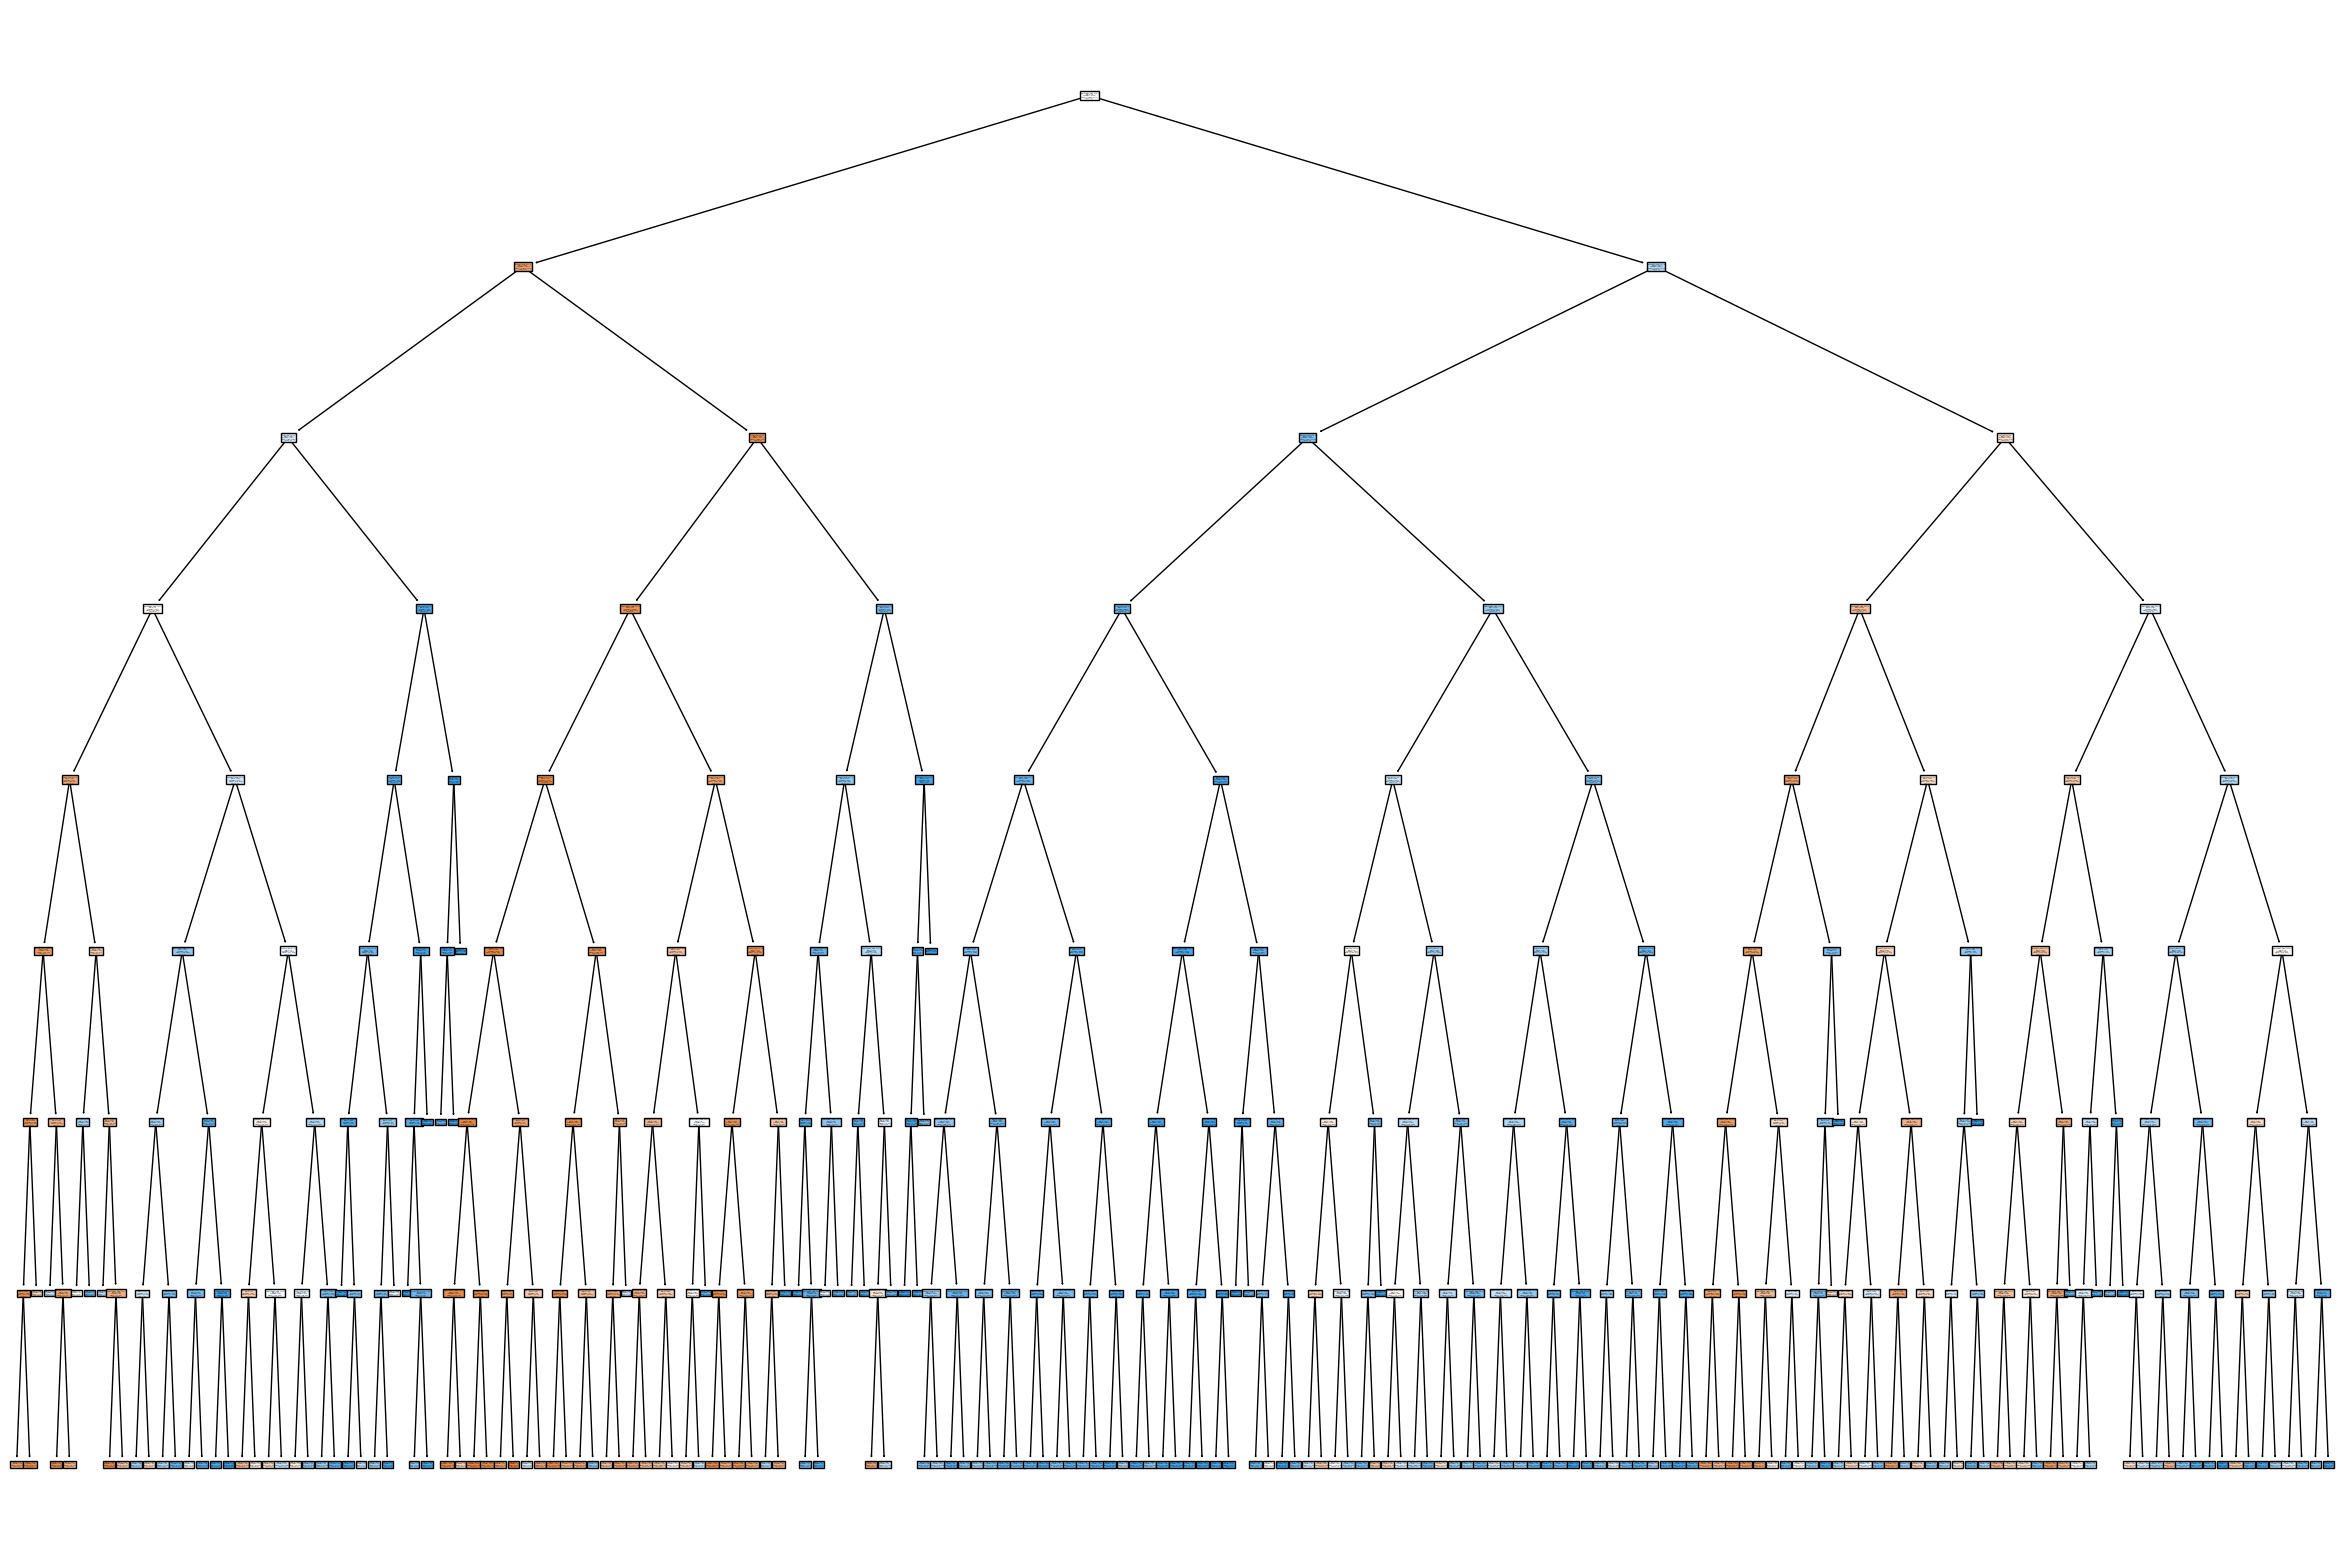

In [298]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(gini_all_tuned,
                   feature_names=X.columns,
                   class_names=["No", "Yes"],
                   filled=True)
plt.savefig("gini_all_tuned.png", dpi=900, bbox_inches="tight")
plt.show()

#### Entropy

In [278]:
# Create your dataset (X: features, y: target labels)
X = df2.drop(columns="HeartDisease_num")
y = df2["HeartDisease_num"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_ent_all = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, min_samples_leaf=2, random_state=42)

# Train the classifier on the training data
clf_ent_all.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf_ent_all.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7301369863013699


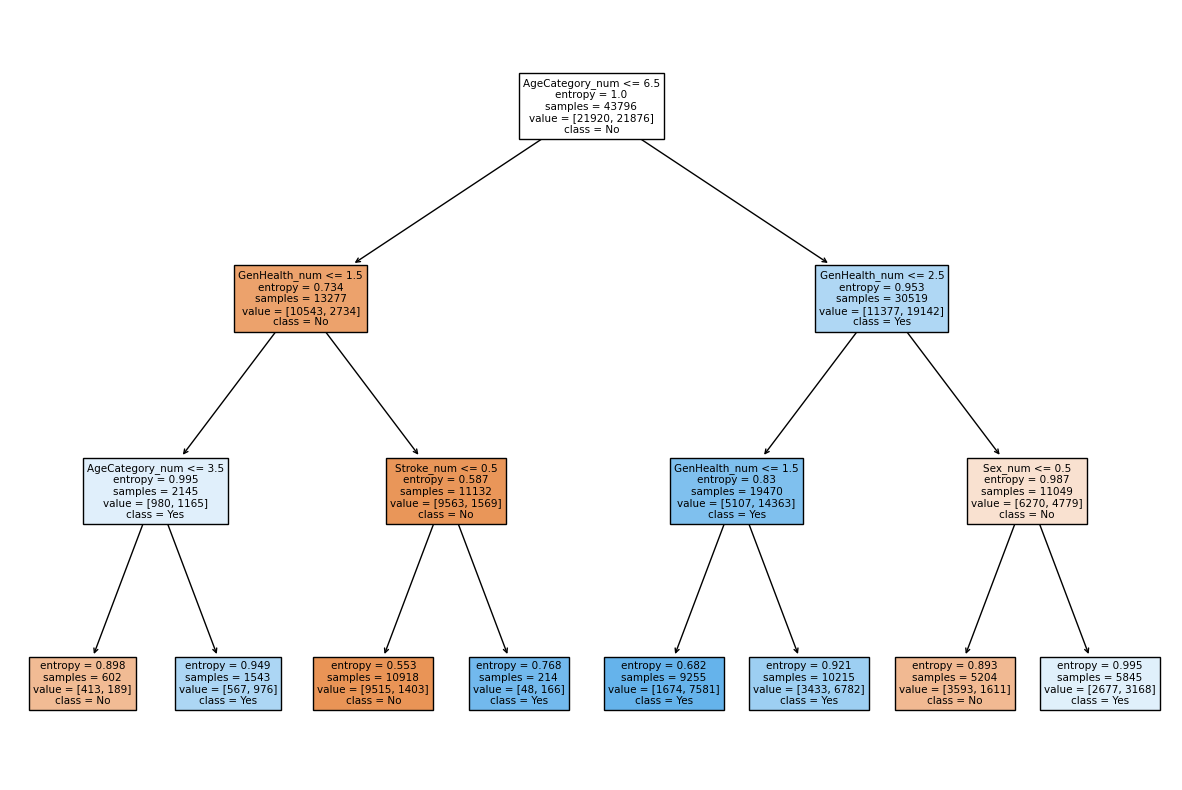

In [279]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_ent_all,
                   feature_names=X.columns,
                   class_names=["No", "Yes"],
                   filled=True)
plt.show()

In [280]:
# entropy tuning

In [281]:
#Parameters
param_grid = {
    'max_depth': [3,5,8,10,14],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [5,7,8,10]
}

In [282]:
# cross validation for finding best parameters
entropy_all_tuned = DecisionTreeClassifier(random_state=50)
grid = GridSearchCV(entropy_all_tuned, param_grid, n_jobs= -1, cv=10)
grid.fit(X_train, y_train)

print(grid.best_params_) 

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [285]:
entropy_all_tuned=DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=2, min_samples_leaf=10, random_state=50)
# Train the classifier on the training data
entropy_all_tuned.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = entropy_all_tuned.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" Test Data Accuracy:", accuracy)

 Test Data Accuracy: 0.7536986301369863


In [286]:
print(" Train Data Accuracy:", accuracy_score(y_train, entropy_all_tuned.predict(X_train)))

 Train Data Accuracy: 0.7643392090601882


In [287]:
print("Test Data Classification Results")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Test Data Classification Results
[[3903 1550]
 [1147 4350]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5453
           1       0.74      0.79      0.76      5497

    accuracy                           0.75     10950
   macro avg       0.76      0.75      0.75     10950
weighted avg       0.76      0.75      0.75     10950



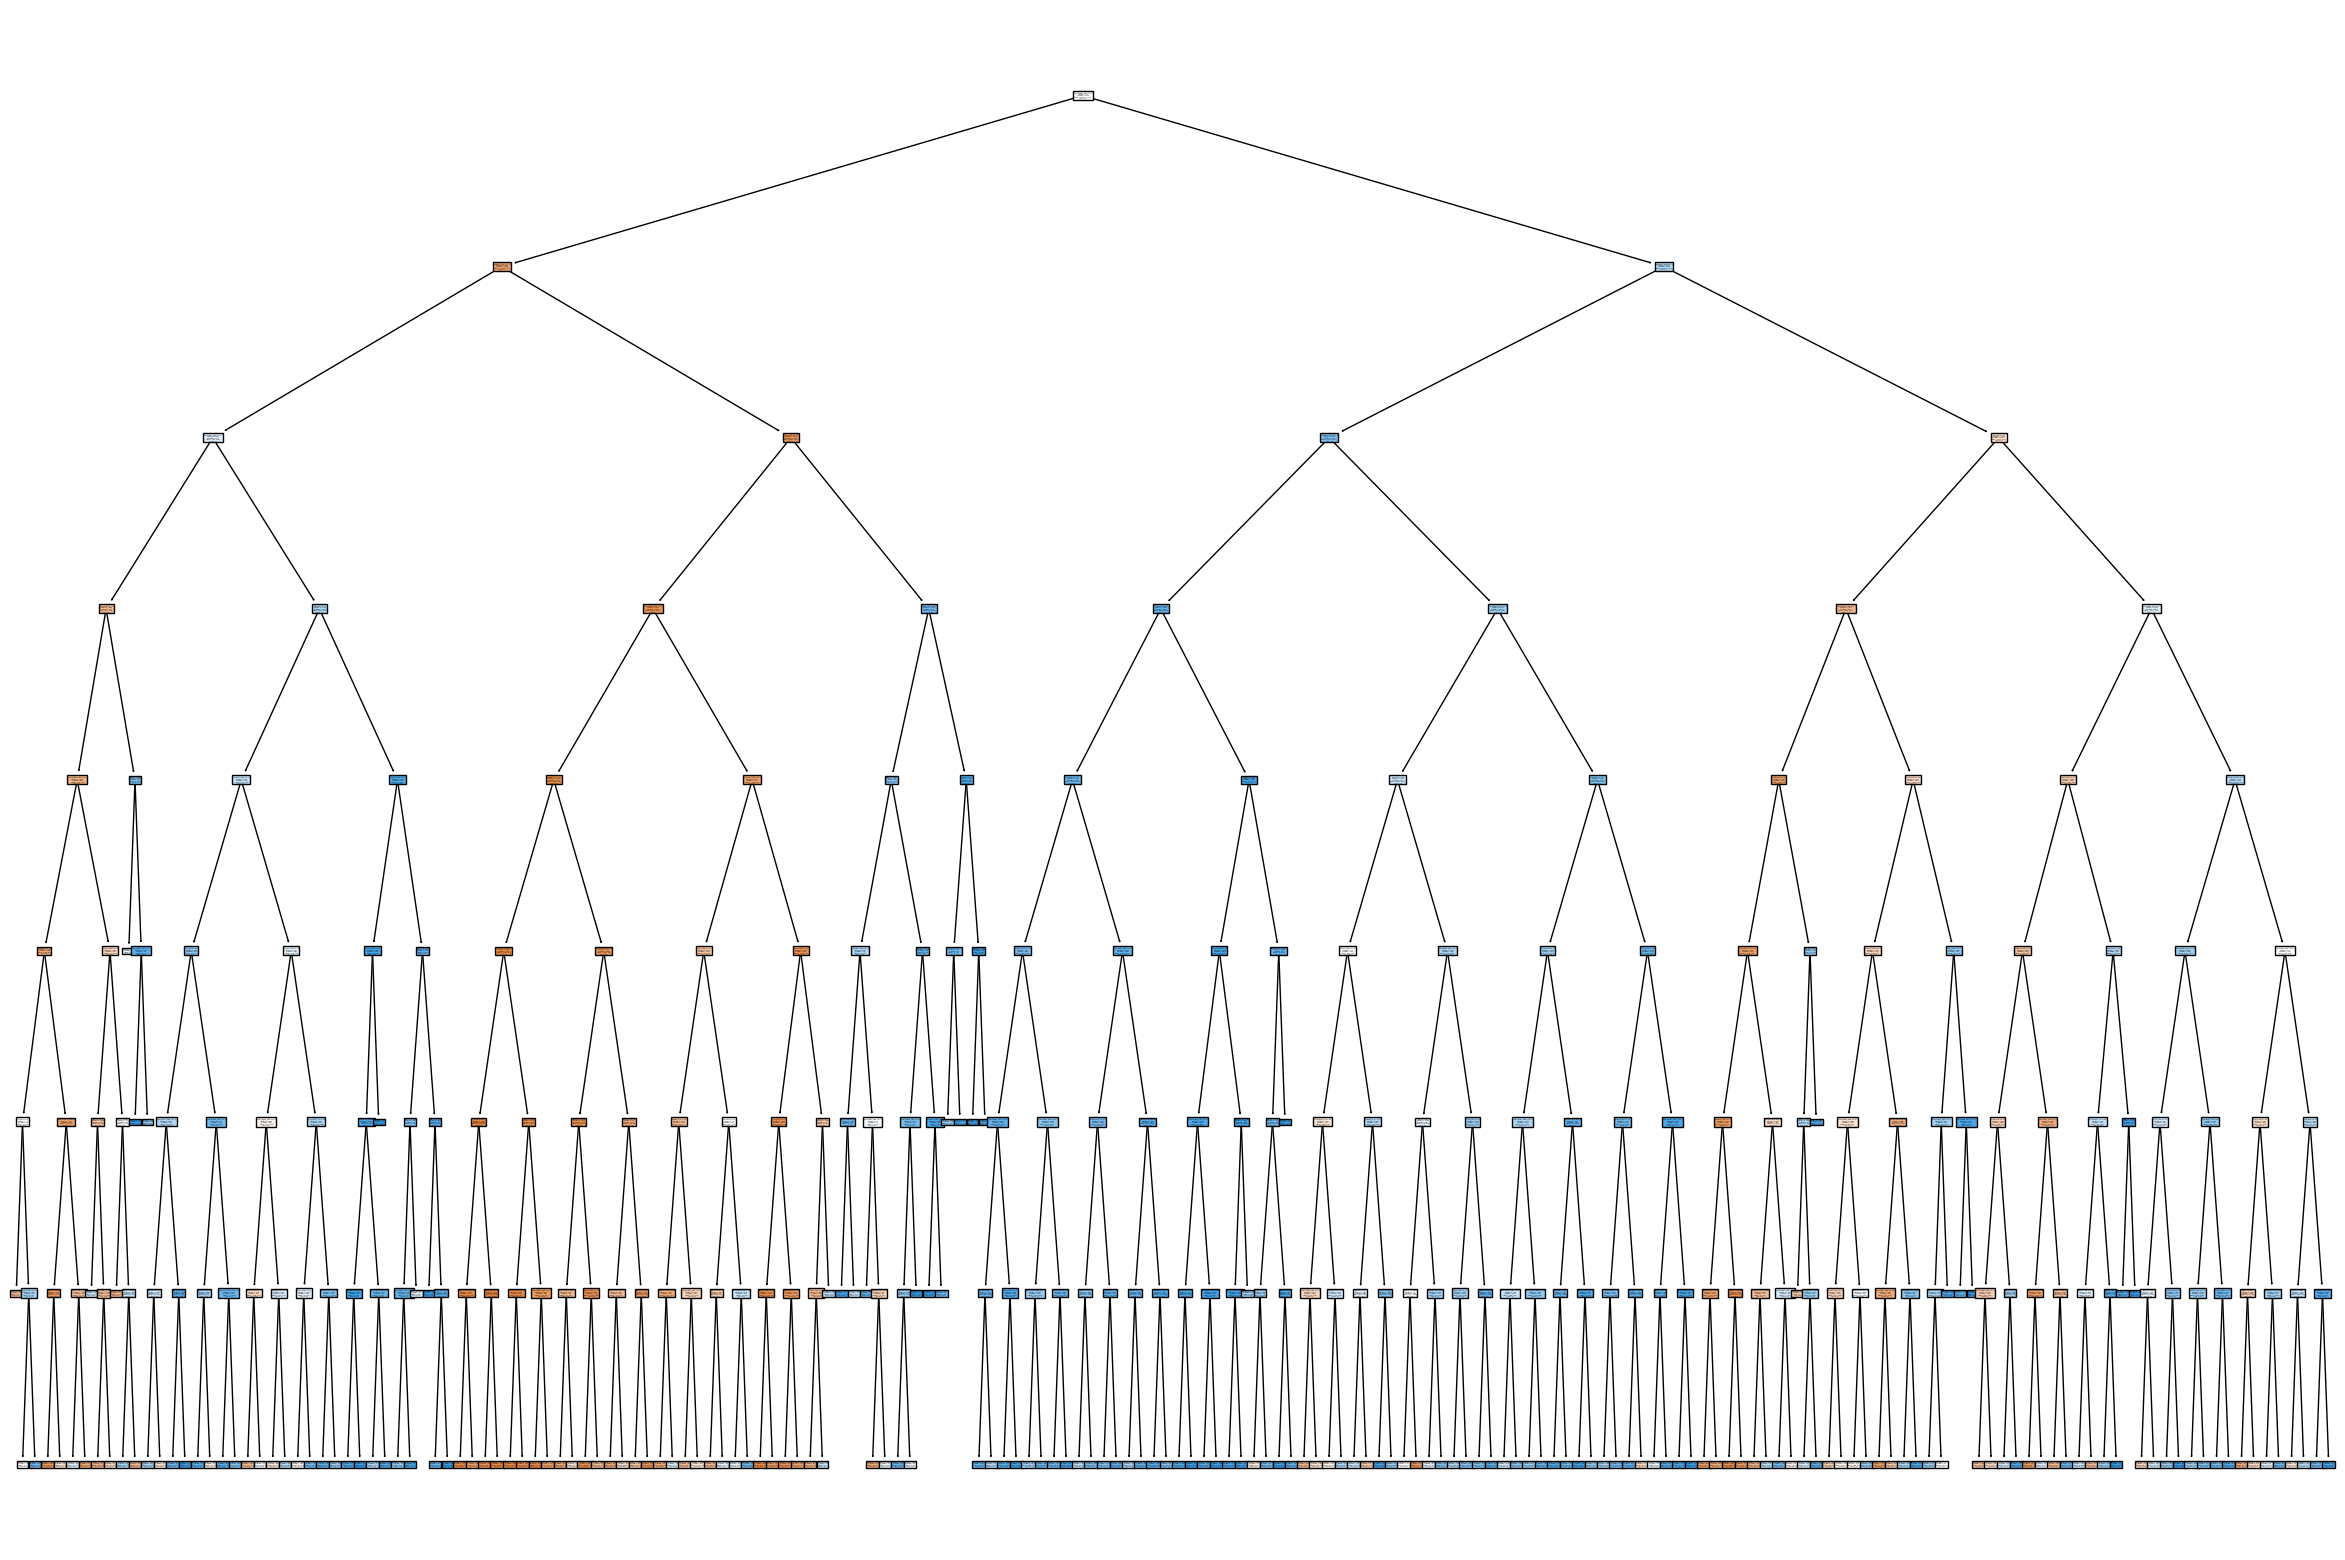

In [297]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(entropy_all_tuned,
                   feature_names=X.columns,
                   class_names=["No", "Yes"],
                   filled=True)
plt.savefig("entropy_all_tuned.png", dpi=900, bbox_inches="tight")
plt.show()